# Laboratorio 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [2]:
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(url)

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

3. Determinar los elementos únicos dentro de la columna ocean_proximity.

In [6]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [7]:
cols = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

df.groupby('ocean_proximity')[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

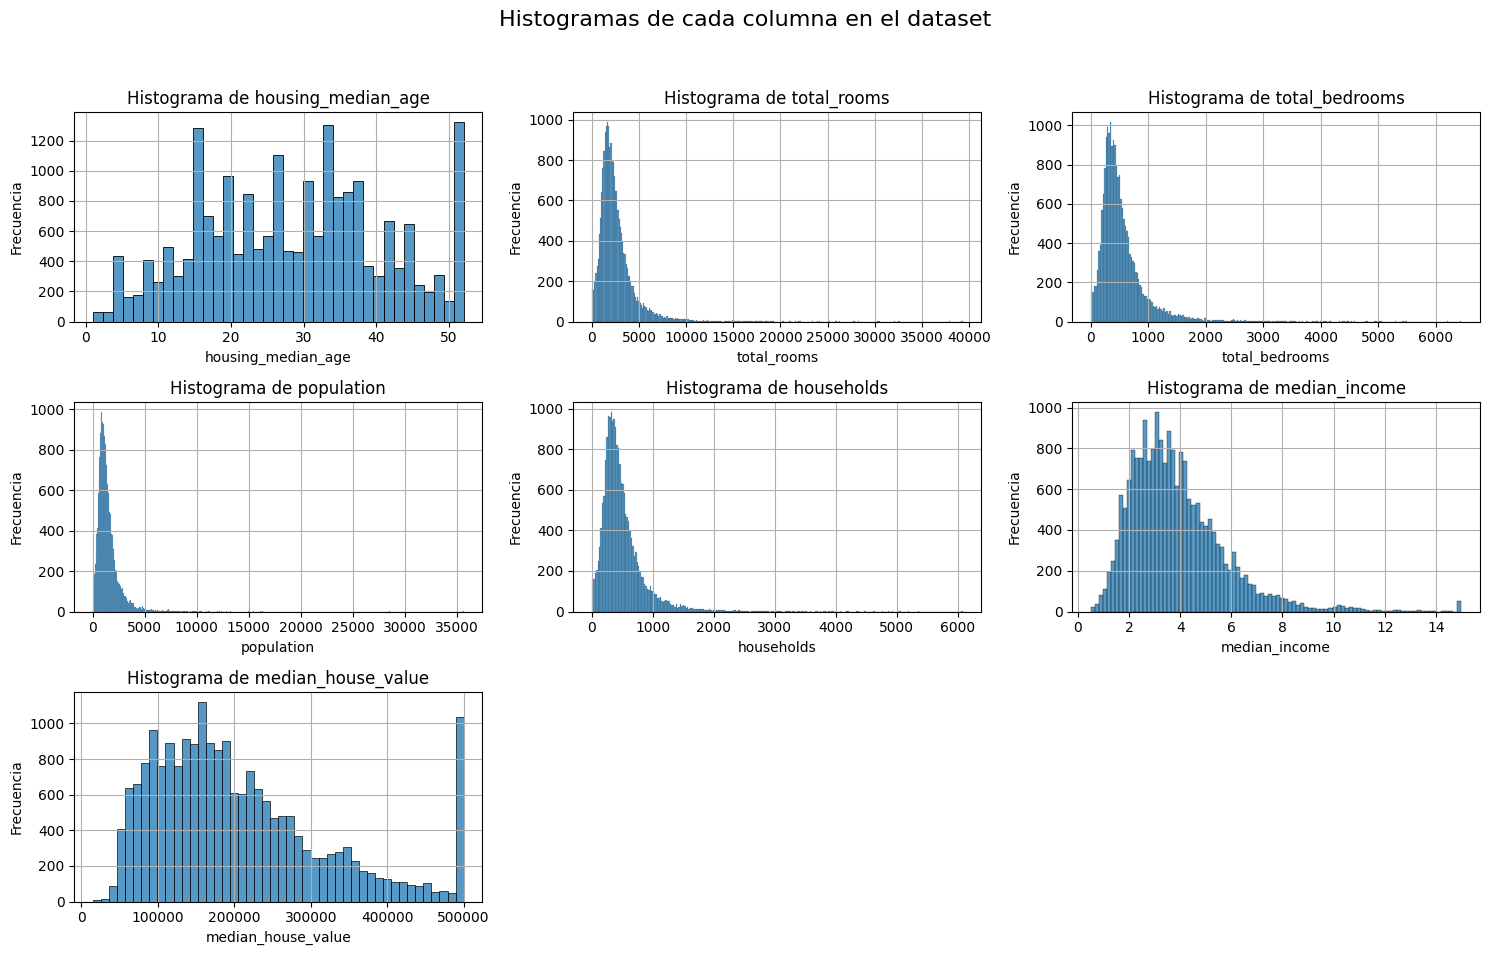

In [8]:
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.suptitle("Histogramas de cada columna en el dataset", fontsize=16)

cols = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col])
    plt.grid()
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

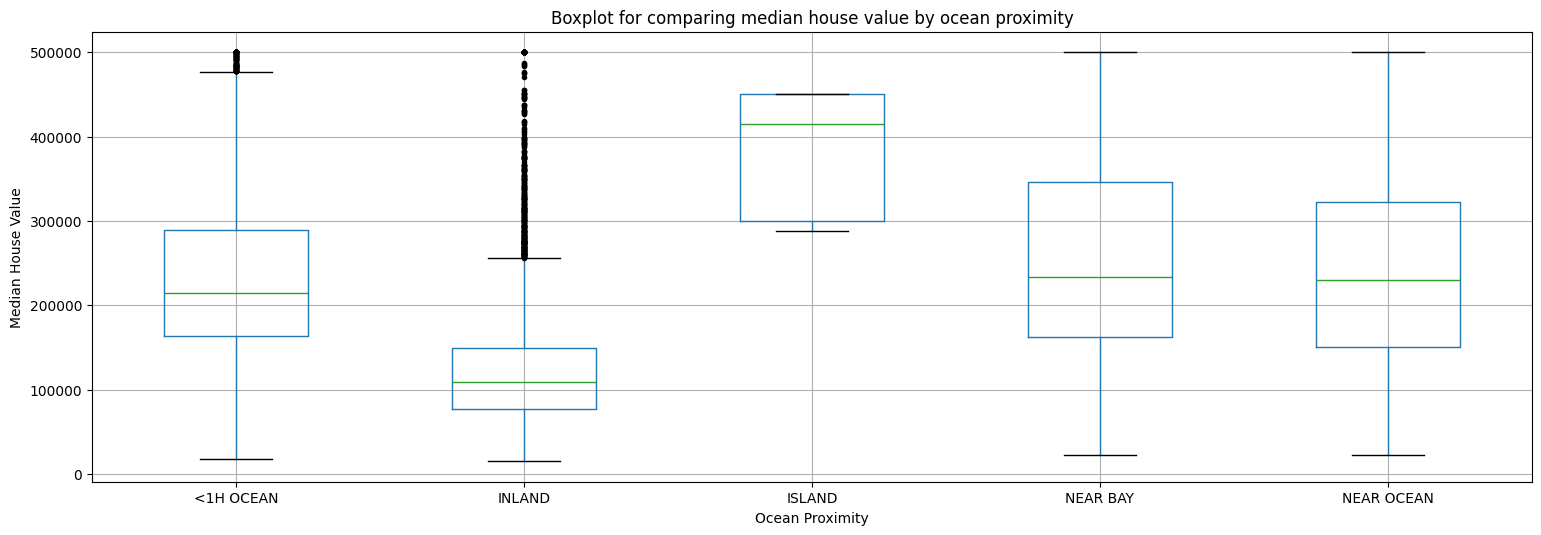

In [9]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym='k.', figsize=(18, 6))

plt.title('Boxplot for comparing median house value by ocean proximity')
plt.suptitle('')  # Eliminar el título adicional que agrega pandas
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


8. Determina la matrix de correlación.

```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

In [10]:
corr_matrix = df.corr()

corr_matrix

/var/folders/2b/69742ps97gbb96vg47gxqjcm0000gs/T/ipykernel_59869/2440519636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


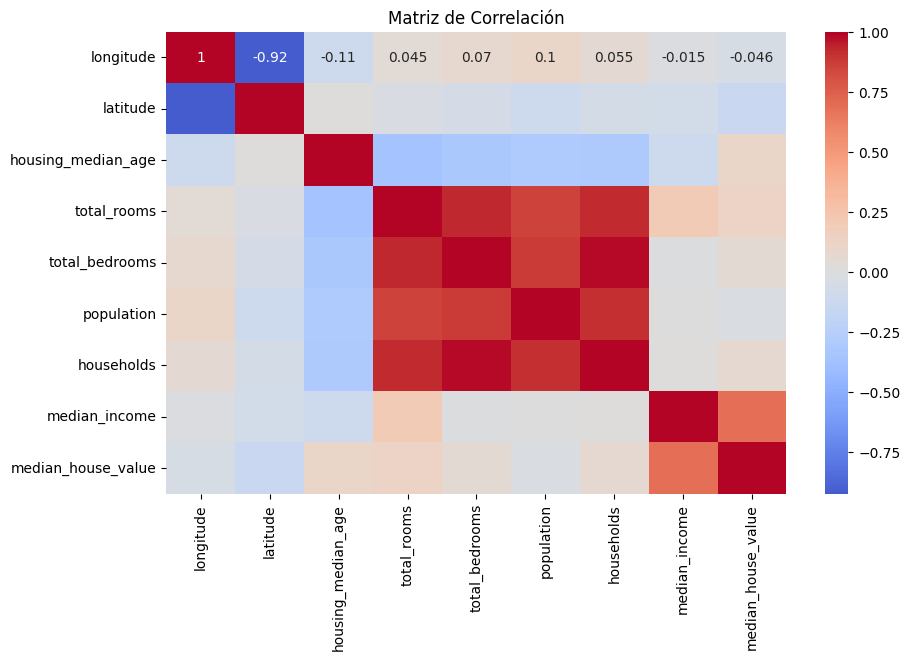

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()

Se pueden observar varias correlaciones interesantes y esperadas, como que `median_income` está altamente correlacionado con `median_house_value`.

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

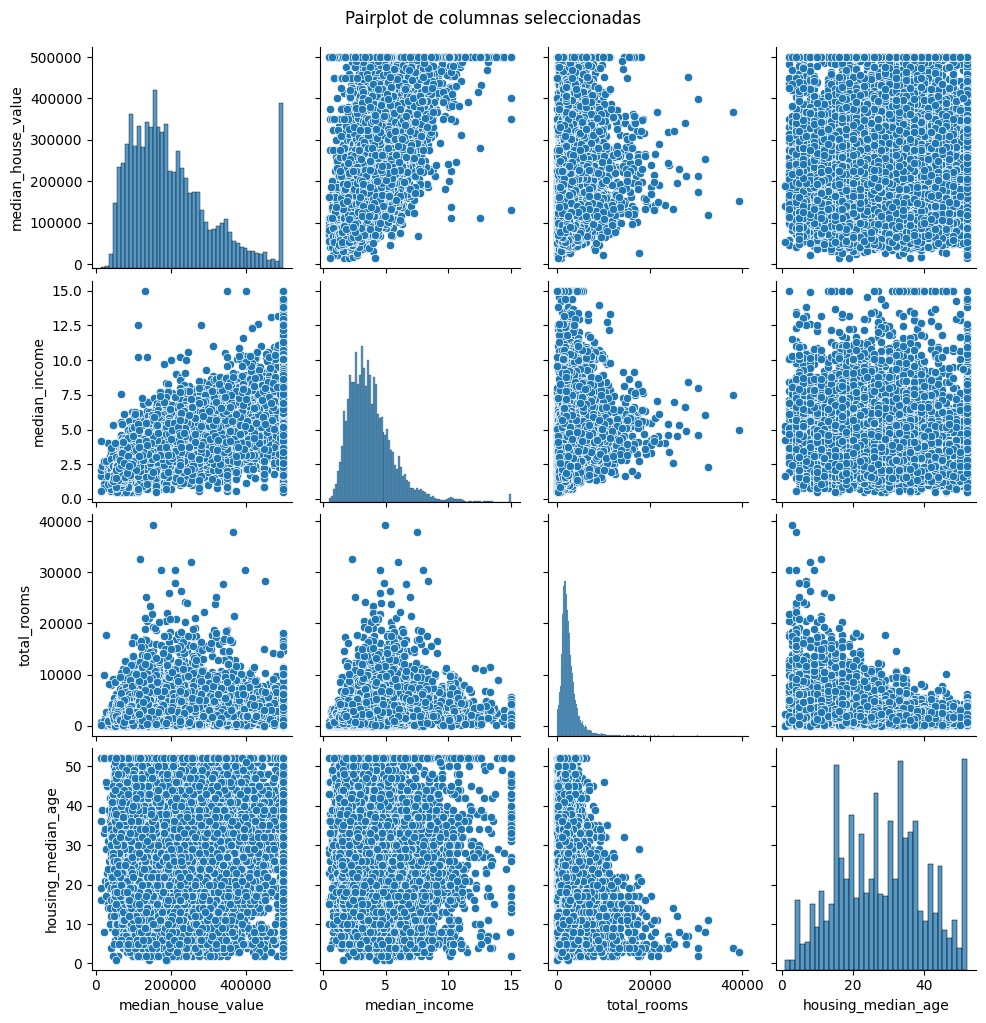

In [12]:
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(df[cols])
plt.suptitle("Pairplot de columnas seleccionadas", y=1.02)
plt.show()

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

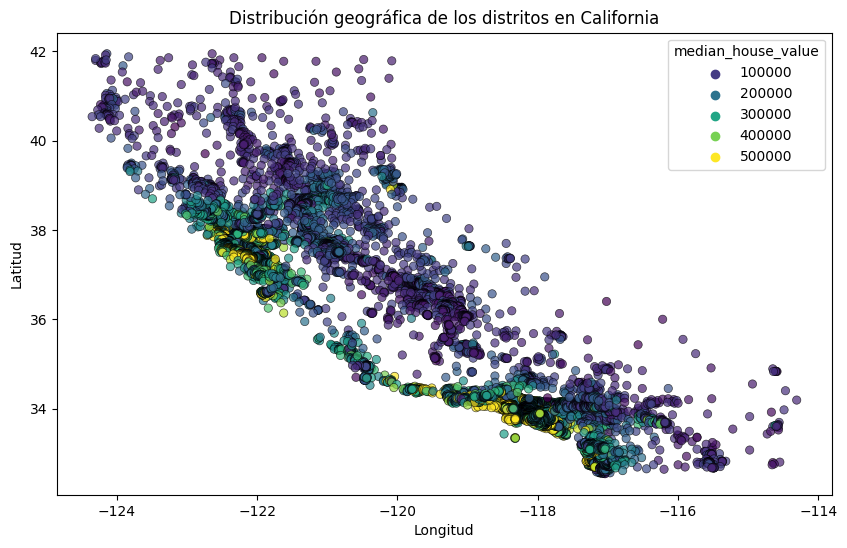

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="median_house_value", palette="viridis", edgecolor="k", alpha=0.7)

plt.title("Distribución geográfica de los distritos en California")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

plt.show()

11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [15]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


La línea es funcional, pero no garantiza que el conjunto de entrenamiento y el conjunto de prueba sean representativos en cuanto a las proporciones de subgrupos o características clave del conjunto original. Simplemente realiza una división aleatoria sin considerar posibles sesgos en las variables. Esto puede introducir sampling bias si ciertos subgrupos están sub o sobrerrepresentados en el conjunto de prueba.

¿Qué pasa en la división de los datos?
- Posible Sampling Bias: Si hay subgrupos importantes en el dataset (por ejemplo, diferentes categorías en ocean_proximity), la división aleatoria podría resultar en una representación no equitativa de estos subgrupos en el conjunto de prueba.
- Data Snooping Bias: Sin una división inicial adecuada, cualquier análisis o prueba inicial que se haga sobre todo el dataset puede influir en los resultados y causar un sesgo. Esto es porque el conjunto de prueba debe ser completamente desconocido hasta que el modelo esté listo para evaluarse.

12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

Text(0.5, 1.0, 'Amount of entries per income category')

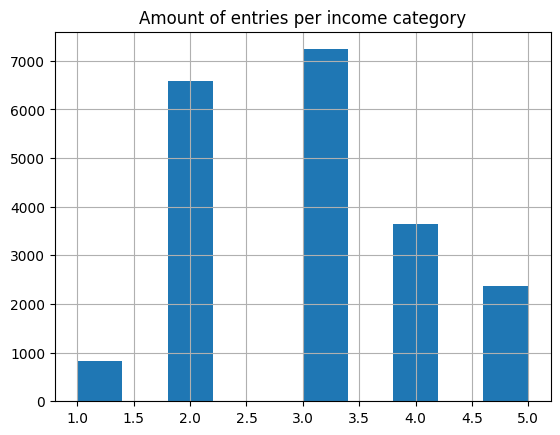

In [16]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

plt.title("Amount of entries per income category")

Ahora se procede a hacer la división de manera estratificada usando estas categorías de income

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Ahora se comprueban las proporciones originales:

In [18]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Y se compara con las proporciones del split train-test estratificado:

In [19]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Las proporciones de la cantidad de entradas correspondientes a cada categoría se mantienen casi iguales en el conjunto original comparado con los conjuntos de entrenamiento y prueba, usando este método. Ahora se compara con la otra función:

In [21]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

3    0.348716
2    0.324188
4    0.173147
5    0.114159
1    0.039789
Name: income_cat, dtype: float64

Ahora las proporciones son diferentes, probando que el otro método es mejor. Un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

In [22]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] = abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [23]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


Con esto se termina de probar que este método estratificado genera proporciones por categoría mucho más similares a las del dataset original, cosa que se puede observar con el error de `Strat. %error` siendo mucho más pequeño que `Rand. %error`.

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:

In [24]:
df_train = strat_train_set
df_test = strat_test_set

In [25]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"] = df_train["population"]/df_train["households"]
df_test["rooms_per_household"] = df_test["total_rooms"]/df_test["households"]
df_test["bedrooms_per_room"] = df_test["total_bedrooms"]/df_test["total_rooms"]
df_test["population_per_household"] = df_test["population"]/df_test["households"]

# Limpieza de datos

Se llenan los nan de `total_bedrooms` con el valor mediano.

In [26]:
total_bedrooms_median = df["total_bedrooms"].median()

df_train["total_bedrooms"] = df_train["total_bedrooms"].fillna(total_bedrooms_median)
df_test["total_bedrooms"] = df_test["total_bedrooms"].fillna(total_bedrooms_median)

Y se sacan estadísticas del dataset:

In [27]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.33958576e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        2.07005322e+05,  3.00678295e+00,  5.44040595e+00,  2.12872772e-01,
        3.09646921e+00])

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [28]:
imp_mean.statistics_

array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.33958576e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        2.07005322e+05,  3.00678295e+00,  5.44040595e+00,  2.12872772e-01,
        3.09646921e+00])

In [29]:
df_train_num.median()

/var/folders/2b/69742ps97gbb96vg47gxqjcm0000gs/T/ipykernel_59869/1813529516.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_num.median()


longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2119.000000
total_bedrooms                 435.000000
population                    1164.000000
households                     408.000000
median_income                    3.541550
median_house_value          179500.000000
rooms_per_household              5.232342
bedrooms_per_room                0.203027
population_per_household         2.817661
dtype: float64

Son diferentes puesto que con `imp_mean` se saca la media mientras que esta última línea saca las medianas.

```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

In [35]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

In [36]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,4.0,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,2.0,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,3.0,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,3.0,6.297405,0.183835,2.411178


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```

In [37]:
from sklearn.preprocessing import OneHotEncoder

df_train["ocean_proximity"].unique()
housing_cat = df_train[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [40]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [41]:
print(cat_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [42]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

Estas líneas de código lo que hicieron fue tomar las variables categóricas correspondientes a `"ocean_proximity"`, y convertirlas a variables 1-Hot, en donde la cantidad de elementos del vector 1-Hot es igual a la cantidad de clases, y se pone un 1 en el elemento que corresponde a la clase y un 0 en todos los demás.

Esto se hace para poder trabajar numéricamente las variables categóricas.

# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [44]:
cols = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population",	"households", "median_income",
    "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"
]

housing_scale = housing_tr_[cols]
housing_scale

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.0,0.0,0.0,0.0,0.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,1.0,0.0,0.0,0.0,0.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

In [46]:
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,1.0,0.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,1.0,0.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,1.0,0.0,0.0,0.0,0.0


Así quedan las variables escaladas.

17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

Se procede a repetir todos los pasos en orden para generar conjuntos de entrenamiento y validación:

In [57]:
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"

df = pd.read_csv(url)

df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

df_train_num = df_train.drop("ocean_proximity", axis=1)
df_test_num = df_test.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_num)

X_train = imp_mean.transform(df_train_num)
X_test = imp_mean.transform(df_test_num)

housing_train = pd.DataFrame(X_train, columns=df_train_num.columns)
housing_test = pd.DataFrame(X_test, columns=df_test_num.columns)

housing_cat = df[["ocean_proximity"]]
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_[0])

housing_train = housing_train.join(df_cat_1hot.loc[train_index].reset_index())
housing_test = housing_test.join(df_cat_1hot.loc[test_index].reset_index())

cols = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population",	"households", "median_income",
    "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"
]

scaler = MinMaxScaler()
scaler.fit(housing_train[cols])

housing_train = pd.DataFrame(scaler.transform(housing_train[cols]), columns=cols)
housing_test = pd.DataFrame(scaler.transform(housing_test[cols]), columns=cols)

In [58]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,1.0,0.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,1.0,0.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,1.0,0.0,0.0,0.0,0.0


In [59]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,1.0,0.0,0.0,0.0,0.0
1,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,1.0,0.0,0.0,0.0,0.0
2,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,1.0,0.0,0.0,0.0,0.0
3,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,1.0,0.0,0.0,0.0,0.0
4,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.703187,0.125399,0.352941,0.057028,0.068460,0.033745,0.068335,0.159798,1.0,0.0,0.0,0.0,0.0
4124,0.608566,0.154091,0.627451,0.022358,0.047036,0.035511,0.052278,0.114592,1.0,0.0,0.0,0.0,0.0
4125,0.461155,0.201913,0.823529,0.045149,0.054768,0.018498,0.066468,0.289658,1.0,0.0,0.0,0.0,0.0
4126,0.641434,0.115834,0.568627,0.052526,0.066044,0.030214,0.076550,0.304313,1.0,0.0,0.0,0.0,0.0


1. ¿que puede concluir respecto al modelo empleado?
    El modelo de escalamiento es apropiado pues permite que ninguna variable tenga prioridad sobre otra al momento de entrenar.
2. ¿El modelo de regresión lineal es valido para lo construido,
    Esto depende de cuál exactamente sea la variable que se quiere predecir. Para ser apropiado esta variable tendría que tener un comportamiento lineal con las que se van a usar de entrada.
3. ¿qué informacion nos da el score?
    El score de un modelo de la información de que tan cercana es la predicción del modelo en el conjunto siendo evaluado al compara con los datos reales que se espera que de.
4. ¿Puede ser ajustado a otro modelo?
    Otro modelo puede ser usado para esta misma tarea, y puede incluso dar mejores resultados porque las regresiones lineales pueden llegar a ser limitadas.
5. ¿Como puede automatizar todo el proceso empleando pipelines?
    Una forma de usar pipelines aquí sería con este código:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(url)

df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

# Pipeline para las columnas numéricas
numeric_features = [
    "longitude", "latitude", "housing_median_age", "total_rooms", 
    "total_bedrooms", "population", "households", "median_income"
]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

# Pipeline para las columnas categóricas
categorical_features = ["ocean_proximity"]
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False))
])

df_train["rooms_per_household"] = df_train["total_rooms"] / df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["population_per_household"] = df_train["population"] / df_train["households"]

df_test["rooms_per_household"] = df_test["total_rooms"] / df_test["households"]
df_test["bedrooms_per_room"] = df_test["total_bedrooms"] / df_test["total_rooms"]
df_test["population_per_household"] = df_test["population"] / df_test["households"]

# Integrar nuevas características al pipeline numérico
numeric_features += ["rooms_per_household", "bedrooms_per_room", "population_per_household"]

# Transformer combinado para procesamiento de columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Aplicar el preprocesamiento en el conjunto de entrenamiento y prueba
X_train = preprocessor.fit_transform(df_train)
X_test = preprocessor.transform(df_test)

# Convertir las matrices de salida en DataFrames para facilidad de uso
housing_train = pd.DataFrame(X_train, columns=numeric_features + list(preprocessor.named_transformers_["cat"].steps[0][1].categories_[0]))
housing_test = pd.DataFrame(X_test, columns=numeric_features + list(preprocessor.named_transformers_["cat"].steps[0][1].categories_[0]))

In [70]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.030938,0.117537,0.001993,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.041176,0.067460,0.001554,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.030281,0.101772,0.001232,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.019575,0.196117,0.000939,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.035276,0.091880,0.001992,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,0.039267,0.094107,0.001072,1.0,0.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.031550,0.088864,0.002149,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,0.021168,0.149772,0.001586,1.0,0.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,0.036703,0.093150,0.001383,1.0,0.0,0.0,0.0,0.0


In [71]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,0.039674,0.063302,0.001274,1.0,0.0,0.0,0.0,0.0
1,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,0.042672,0.057756,0.001874,1.0,0.0,0.0,0.0,0.0
2,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,0.029502,0.095358,0.001807,1.0,0.0,0.0,0.0,0.0
3,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,0.030980,0.107347,0.002309,1.0,0.0,0.0,0.0,0.0
4,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,0.035689,0.069419,0.001402,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.703187,0.125399,0.352941,0.057028,0.068460,0.033745,0.068335,0.159798,0.035362,0.099941,0.002082,1.0,0.0,0.0,0.0,0.0
4124,0.608566,0.154091,0.627451,0.022358,0.047036,0.035511,0.052278,0.114592,0.014263,0.258004,0.003067,1.0,0.0,0.0,0.0,0.0
4125,0.461155,0.201913,0.823529,0.045149,0.054768,0.018498,0.066468,0.289658,0.027308,0.102252,0.000933,1.0,0.0,0.0,0.0,0.0
4126,0.641434,0.115834,0.568627,0.052526,0.066044,0.030214,0.076550,0.304313,0.027677,0.109931,0.001554,1.0,0.0,0.0,0.0,0.0
